<a href="https://colab.research.google.com/github/jai2shan/TSAI-EVA40-Assignments/blob/master/Session%2011/Lasttrial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import os
os.chdir(r'/content/TSAI-EVA40-Assignments/Session 11/asgnmt11')

# os.chdir(r'/content')
# !git clone https://github.com/jai2shan/TSAI-EVA40-Assignments.git
!git pull origin master
import os
os.chdir(r'/content/TSAI-EVA40-Assignments/Session 11/asgnmt11')

remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 14 (delta 11), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (14/14), done.
From https://github.com/jai2shan/TSAI-EVA40-Assignments
 * branch            master     -> FETCH_HEAD
   752a5e8..74d7965  master     -> origin/master
Updating 752a5e8..74d7965
Fast-forward
 Session 11/ReadMe.md              | 14 ++++++++++----
 Session 11/asgnmt11/DataLoader.py |  8 ++++----
 2 files changed, 14 insertions(+), 8 deletions(-)


In [14]:
from torchvision import transforms
from DataLoader import cifar_data_loader,View_images
import torch
from torchsummary import summary
from assignment11_model_DropOut import Net

from LR_Finder_acc import *
from LR_Min_Max import *
from Training_Testing import TrainTest
import torch.optim as optim
import torch.nn as nn
from torch.optim.lr_scheduler import StepLR
from ModelPerformance import *
from gradcam import GradCamDisplay
import PIL
from gradcam import *
import copy

In [15]:
### Data Loading
trainloader,testloader = cifar_data_loader(BatchSize=512)

Files already downloaded and verified
Files already downloaded and verified


In [16]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

net = Net().to(device)
summary(net, input_size=(3,32,32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
              ReLU-2           [-1, 64, 32, 32]               0
    GhostBatchNorm-3           [-1, 64, 32, 32]             128
            Conv2d-4          [-1, 128, 32, 32]          73,728
         MaxPool2d-5          [-1, 128, 16, 16]               0
    GhostBatchNorm-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
           Dropout-8          [-1, 128, 16, 16]               0
            Conv2d-9          [-1, 128, 16, 16]         147,456
   GhostBatchNorm-10          [-1, 128, 16, 16]             256
             ReLU-11          [-1, 128, 16, 16]               0
           Conv2d-12          [-1, 128, 16, 16]         147,456
   GhostBatchNorm-13          [-1, 128, 16, 16]             256
             ReLU-14          [-1,

## Estimating LR Max


Learning rate search finished. See the graph with {finder_name}.plot()


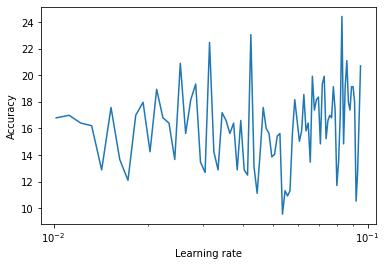

82    0.082845
Name: lr, dtype: float64

In [17]:
lr_max = LR_Max(net,trainloader,start = 1e-4,end = 0.1,iters = 100,mode = 'linear')
lr_max

## Estimating LR Min


In [18]:

lr_min =  LR_Min(trainloader,lr_max)

  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 0


Loss=2.448215961456299 Batch_id=97 Accuracy=13.30: 100%|██████████| 98/98 [00:30<00:00,  3.16it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 1


Loss=2.0900330543518066 Batch_id=97 Accuracy=23.47: 100%|██████████| 98/98 [00:31<00:00,  3.14it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 2


Loss=1.835247278213501 Batch_id=97 Accuracy=33.16: 100%|██████████| 98/98 [00:31<00:00,  3.12it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 0


Loss=2.5617499351501465 Batch_id=97 Accuracy=12.55: 100%|██████████| 98/98 [00:31<00:00,  3.07it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 1


Loss=2.3496556282043457 Batch_id=97 Accuracy=18.14: 100%|██████████| 98/98 [00:31<00:00,  3.08it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 2


Loss=2.0898523330688477 Batch_id=97 Accuracy=26.26: 100%|██████████| 98/98 [00:31<00:00,  3.09it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 0


Loss=2.2451374530792236 Batch_id=97 Accuracy=13.73: 100%|██████████| 98/98 [00:31<00:00,  3.09it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 1


Loss=2.0224859714508057 Batch_id=97 Accuracy=24.78: 100%|██████████| 98/98 [00:31<00:00,  3.08it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 2


Loss=1.804368495941162 Batch_id=97 Accuracy=34.31: 100%|██████████| 98/98 [00:31<00:00,  3.07it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 0


Loss=2.0778839588165283 Batch_id=97 Accuracy=16.87: 100%|██████████| 98/98 [00:32<00:00,  3.06it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 1


Loss=1.7211763858795166 Batch_id=97 Accuracy=30.14: 100%|██████████| 98/98 [00:32<00:00,  3.06it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 2


Loss=1.493868350982666 Batch_id=97 Accuracy=40.88: 100%|██████████| 98/98 [00:31<00:00,  3.07it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 0


Loss=2.082179069519043 Batch_id=97 Accuracy=17.32: 100%|██████████| 98/98 [00:31<00:00,  3.08it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 1


Loss=2.024477005004883 Batch_id=97 Accuracy=28.59: 100%|██████████| 98/98 [00:31<00:00,  3.08it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 2


Loss=1.5353261232376099 Batch_id=97 Accuracy=36.17: 100%|██████████| 98/98 [00:31<00:00,  3.08it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 0


Loss=1.9903182983398438 Batch_id=97 Accuracy=18.31: 100%|██████████| 98/98 [00:31<00:00,  3.09it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 1


Loss=1.883020281791687 Batch_id=97 Accuracy=34.11: 100%|██████████| 98/98 [00:31<00:00,  3.10it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 2


Loss=1.4124404191970825 Batch_id=97 Accuracy=45.34: 100%|██████████| 98/98 [00:31<00:00,  3.08it/s]


In [19]:
print('LR Min is ',lr_min)


LR Min is  0.008284545454545456


In [20]:
net = Net().to(device)
tt = TrainTest()
test_acc = 0
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = 0.1, momentum = 0.85,weight_decay = 0.0005)
scheduler = optim.lr_scheduler.OneCycleLR(optimizer,
                                          max_lr = lr_max.values[0], 
                                          pct_start = 5/24, # 5/24
                                          epochs =24,
                                          steps_per_epoch=len(trainloader),
                                          div_factor = lr_max.values[0]/lr_min,
                                          final_div_factor = 1)

# net = Net().to(device)
for epoch in range(24):
    print("EPOCH:", epoch)
    tt.train_(net, device, trainloader, optimizer, criterion, epoch,L1 = False)
    acc = tt.test_(net, device, testloader)  
    scheduler.step()
       
print('Finished Training')

  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 0


Loss=2.5522618293762207 Batch_id=97 Accuracy=13.04: 100%|██████████| 98/98 [00:31<00:00,  3.08it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 2.6934, Accuracy: 1630/10000 (16.30%)

EPOCH: 1


Loss=2.0978143215179443 Batch_id=97 Accuracy=23.22: 100%|██████████| 98/98 [00:31<00:00,  3.09it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.9692, Accuracy: 2746/10000 (27.46%)

EPOCH: 2


Loss=1.8466564416885376 Batch_id=97 Accuracy=30.17: 100%|██████████| 98/98 [00:31<00:00,  3.10it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.7643, Accuracy: 3671/10000 (36.71%)

EPOCH: 3


Loss=1.7642135620117188 Batch_id=97 Accuracy=37.59: 100%|██████████| 98/98 [00:31<00:00,  3.10it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.6263, Accuracy: 4235/10000 (42.35%)

EPOCH: 4


Loss=1.4262974262237549 Batch_id=97 Accuracy=41.51: 100%|██████████| 98/98 [00:31<00:00,  3.09it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.4418, Accuracy: 4747/10000 (47.47%)

EPOCH: 5


Loss=1.3619264364242554 Batch_id=97 Accuracy=47.21: 100%|██████████| 98/98 [00:31<00:00,  3.08it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.4259, Accuracy: 5195/10000 (51.95%)

EPOCH: 6


Loss=1.4595178365707397 Batch_id=97 Accuracy=50.95: 100%|██████████| 98/98 [00:31<00:00,  3.07it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.2844, Accuracy: 5415/10000 (54.15%)

EPOCH: 7


Loss=1.1896049976348877 Batch_id=97 Accuracy=54.20: 100%|██████████| 98/98 [00:31<00:00,  3.09it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.2361, Accuracy: 6025/10000 (60.25%)

EPOCH: 8


Loss=1.2362375259399414 Batch_id=97 Accuracy=58.06: 100%|██████████| 98/98 [00:31<00:00,  3.10it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.0704, Accuracy: 6556/10000 (65.56%)

EPOCH: 9


Loss=1.0541385412216187 Batch_id=97 Accuracy=60.71: 100%|██████████| 98/98 [00:31<00:00,  3.09it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.0899, Accuracy: 6645/10000 (66.45%)

EPOCH: 10


Loss=1.2381879091262817 Batch_id=97 Accuracy=63.36: 100%|██████████| 98/98 [00:31<00:00,  3.09it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.9492, Accuracy: 6975/10000 (69.75%)

EPOCH: 11


Loss=0.8839062452316284 Batch_id=97 Accuracy=66.77: 100%|██████████| 98/98 [00:31<00:00,  3.09it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.8402, Accuracy: 7030/10000 (70.30%)

EPOCH: 12


Loss=0.8715946674346924 Batch_id=97 Accuracy=68.87: 100%|██████████| 98/98 [00:31<00:00,  3.08it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.7958, Accuracy: 7232/10000 (72.32%)

EPOCH: 13


Loss=0.7857135534286499 Batch_id=97 Accuracy=70.46: 100%|██████████| 98/98 [00:31<00:00,  3.09it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.6603, Accuracy: 7711/10000 (77.11%)

EPOCH: 14


Loss=0.8153655529022217 Batch_id=97 Accuracy=71.82: 100%|██████████| 98/98 [00:31<00:00,  3.09it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.6150, Accuracy: 7859/10000 (78.59%)

EPOCH: 15


Loss=0.8326671123504639 Batch_id=97 Accuracy=73.52: 100%|██████████| 98/98 [00:31<00:00,  3.07it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.6070, Accuracy: 7903/10000 (79.03%)

EPOCH: 16


Loss=0.7940621376037598 Batch_id=97 Accuracy=73.57: 100%|██████████| 98/98 [00:32<00:00,  3.06it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.5940, Accuracy: 7928/10000 (79.28%)

EPOCH: 17


Loss=0.6184718012809753 Batch_id=97 Accuracy=75.90: 100%|██████████| 98/98 [00:31<00:00,  3.09it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.5633, Accuracy: 8025/10000 (80.25%)

EPOCH: 18


Loss=0.7800339460372925 Batch_id=97 Accuracy=76.51: 100%|██████████| 98/98 [00:31<00:00,  3.09it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.5327, Accuracy: 8198/10000 (81.98%)

EPOCH: 19


Loss=0.630405843257904 Batch_id=97 Accuracy=77.16: 100%|██████████| 98/98 [00:31<00:00,  3.09it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.5287, Accuracy: 8200/10000 (82.00%)

EPOCH: 20


Loss=0.6380009651184082 Batch_id=97 Accuracy=77.86: 100%|██████████| 98/98 [00:31<00:00,  3.09it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.5220, Accuracy: 8258/10000 (82.58%)

EPOCH: 21


Loss=0.6074394583702087 Batch_id=97 Accuracy=78.96: 100%|██████████| 98/98 [00:31<00:00,  3.09it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.5000, Accuracy: 8278/10000 (82.78%)

EPOCH: 22


Loss=0.5700795650482178 Batch_id=97 Accuracy=79.48: 100%|██████████| 98/98 [00:31<00:00,  3.07it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.4656, Accuracy: 8393/10000 (83.93%)

EPOCH: 23


Loss=0.6227666139602661 Batch_id=97 Accuracy=80.17: 100%|██████████| 98/98 [00:31<00:00,  3.08it/s]



Test set: Average loss: 0.4451, Accuracy: 8487/10000 (84.87%)

Finished Training


In [21]:
5/24

0.20833333333333334